In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
import os

In [16]:
# akses data
for dirname, _, filenames in os.walk('/kaggle/input/rockpaperscissors'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rockpaperscissors/README_rpc-cv-images.txt
/kaggle/input/rockpaperscissors/paper/cQ0dBO3yHPohZ9U9.png
/kaggle/input/rockpaperscissors/paper/jAh36hlZLpECSBHp.png
/kaggle/input/rockpaperscissors/paper/QnjBVl6cFnyd2hVF.png
/kaggle/input/rockpaperscissors/paper/dZh2VMRu9nRGHhYL.png
/kaggle/input/rockpaperscissors/paper/SDQQfzHl47yNqA6K.png
/kaggle/input/rockpaperscissors/paper/E10FR2TKbBsv9Hgm.png
/kaggle/input/rockpaperscissors/paper/BoMfAmQYWtoiGHBV.png
/kaggle/input/rockpaperscissors/paper/AfvIbTwxuG0q7Ij1.png
/kaggle/input/rockpaperscissors/paper/41HC0VBlHSRhi0AG.png
/kaggle/input/rockpaperscissors/paper/gpipGA62xfMjfr8O.png
/kaggle/input/rockpaperscissors/paper/9rwmakEj6Wg1YQWW.png
/kaggle/input/rockpaperscissors/paper/D3mbFhVy7zFkZEtV.png
/kaggle/input/rockpaperscissors/paper/cuDzhxpWujBPgJmX.png
/kaggle/input/rockpaperscissors/paper/5FVy5hSvZ9c0M2Y5.png
/kaggle/input/rockpaperscissors/paper/4aWP3XumkgwZtqZ7.png
/kaggle/input/rockpaperscissors/paper/aac4C8FFlVQw6aGM.png

In [17]:
# load dataset
import cv2
import glob
image_paths = glob.glob('/kaggle/input/rockpaperscissors/*/*.png')
images = [cv2.imread(image_path) for image_path in image_paths]

In [18]:
labels = [path.split('/')[-2] for path in image_paths]

In [33]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

height = 150
width = 150
channels = 3  # jumlah saluran warna (RGB)

# Mengubah gambar menjadi array NumPy dan mengubah ukuran
images_resized = [cv2.resize(image, (height, width)) for image in images]
X = np.array(images_resized)
y = np.array(labels_encoded)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode labels for multi-class classification
num_classes = len(np.unique(labels))
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)

In [28]:
# one hot encoding
import numpy as np
from tensorflow.keras.utils import to_categorical

# One-hot encode labels for multi-class classification
num_classes = len(np.unique(labels))
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print("Building a deep fully connected model with regularization...")

# Define the model
model = Sequential()

# Input layer - flatten image
model.add(Flatten(input_shape=(height, width, channels)))

# First dense block
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second dense block
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third dense block
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(" Model compiled successfully.\n")

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',     # Watch validation loss
    patience=5,             # Stop after 5 epochs without improvement
    restore_best_weights=True
)

Building a deep fully connected model with regularization...
 Model compiled successfully.



In [30]:
# Train the model
history = model.fit(
    X_train, y_train_encoded,  # Use one-hot encoded training labels
    epochs=50,
    batch_size=128,
    validation_data=(X_val, y_val_encoded), # Use one-hot encoded validation labels
    callbacks=[early_stop],
    verbose=1
)

print("\n Training finished. Evaluating model...")

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 962ms/step - accuracy: 0.5844 - loss: 1.1472 - val_accuracy: 0.3379 - val_loss: 47.6542
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 996ms/step - accuracy: 0.7789 - loss: 0.6196 - val_accuracy: 0.6689 - val_loss: 1.5349
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 889ms/step - accuracy: 0.8609 - loss: 0.4071 - val_accuracy: 0.7078 - val_loss: 1.0399
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 948ms/step - accuracy: 0.8775 - loss: 0.3948 - val_accuracy: 0.7123 - val_loss: 0.8198
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 917ms/step - accuracy: 0.8988 - loss: 0.2988 - val_accuracy: 0.8196 - val_loss: 0.5866
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 907ms/step - accuracy: 0.9196 - loss: 0.2541 - val_accuracy: 0.7717 - val_loss: 0.5983
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 926ms/step - accuracy: 0.9290 - loss: 0.2327 - val_accuracy: 0.7192 - val_loss: 0.6575
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 911ms/step - accuracy: 0.9303 - loss: 0.1893 - val_acc

### Evaluate the model

In [34]:
#evaluate the model
loss, accuracy = model.evaluate(X_val, y_val_encoded)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7992 - loss: 0.5114
Validation Loss: 0.4244
Validation Accuracy: 83.56%


### Visualize Training History

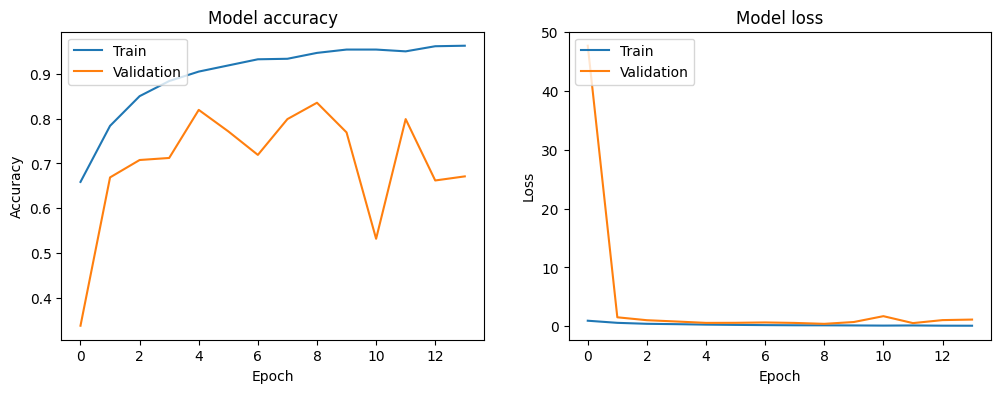

In [31]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()